In [1]:
#from preamble import *
#%matplotlib inline
#=================================
from IPython.display import set_matplotlib_formats, display
import pandas as pd
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=( cycler('color', mglearn.plot_helpers.cm_cycle.colors) +  cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))


/var/folders/l_/499_8k_5387b9tz3wp5g8lg00000gn/T/ipykernel_18047/2603895367.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'png')


## Model Evaluation and Improvement

- We have seen many ML algorithms and how to prepare our data to select best feature. We will now dive more deeply into evaluating models and selecting parameter of unsupervised approach <br></br>
- Model evaluation, Model performance , Performance Measures <br></br>

![](./images/mode_performance.jpeg)



## Three different APIs for evaluating the quality of a model’s predictions:

- Estimator score method: **Estimators have a score method** providing a default evaluation criterion for the problem they are designed to solve. <br><br>

- Scoring parameter: Model-evaluation tools using cross-validation (such as model_selection.cross_val_score and model_selection.GridSearchCV) rely on an internal scoring strategy. <br><br>

- Metric functions: The sklearn.metrics module implements functions assessing prediction error for specific purposes. 

- We have been using score to estimate the performance 

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
score = logreg.score(X_test, y_test)
print(f"Test set score: {score:.3f}")

Test set score: 0.880


- This chapter will introduce better ways of evaluating model that go beyond simple accuracy<br><br>
  

Simply splitting the data into training and test set doesn't allow to have a real idea of the model performance. You can say “Wow”, 90% of accuracy on the training set, but after you see 60% of test accuracy. Some of the issues related to this are:

> 
> The machine learning methods often fail to model the data because they learn particular features of the training set, that are not present in the test set. So these features are not representative and we are in a situation of Overfitting. It happens when the model fits too much of the training data, but it’s not able to generalize in new samples. 

> But, Holdout Method suffers from issues of high variance. This is because it is not certain which data points will end up in the validation set and the result might be entirely different for different sets ( the results can depend on a particular random choice for the pair of (train, validation) sets.)




![](./images/balanced-or-imbalanced.png)

- Also, partitioning the available data into two sets, we drastically reduce the number of samples which can be used for learning the model.More data will usually result in more accurate models.

> There are many ways to address this issue: regularization, selection of the best hyperparameters, and K fold cross validation.

### Cross-Validation

- A good way to evaluate a model is to use cross-validation <br><br>

- Cross-validation is a statistical method of evaluating generalization performance that is more stable and thorough than using a split into a training and a test set.<br><br>
- In cross-validation, the data is instead split repeatedly and multiple models are trained. <br><br>
- The most commonly used version of cross-validation is k-fold cross-validation, where k is a user-specified number, usually 5 or 10.



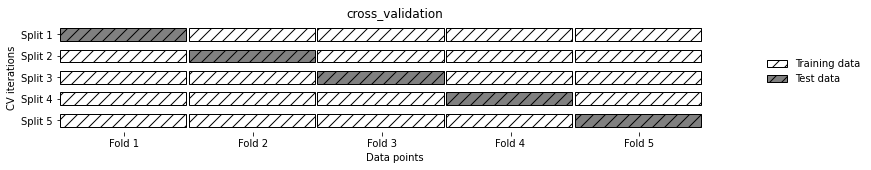

In [3]:
mglearn.plots.plot_cross_validation()

#### Cross-Validation in scikit-learn

- Cross-validation is implemented in scikit-learn using the **cross_val_score** function from the model_selection module. <br><br>

- The parameters of the cross_val_score function are the model we want to evaluate, the training data, and the ground-truth labels. 




 <center>
 cross_val_score: (estimator, X, y=None..)
</center>


In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, .datirisa, iris.target) # SKlearn 3 fold
print("Cross-validation scores: {}".format(scores))


SyntaxError: invalid syntax (3820258140.py, line 8)

> No more X_train, y_train....

In [ ]:
pd.DataFrame(iris.data).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
pd.DataFrame(iris.target).head()

,0
0,0
1,0
2,0
3,0
4,0


By default, cross_val_score performs three-fold cross-validation, returning three accuracy values. We can change the number of folds used by changing the cv parameter


In [ ]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


A common way to summarize the cross-validation accuracy is to compute the mean:


In [ ]:
print(f"Average cross-validation score: {scores.mean()}")

Average cross-validation score: 0.9733333333333334


In [ ]:
print(f"Average cross-validation score: {scores.mean():.3f}")

Average cross-validation score: 0.973


Why we use mean? The mean is used to summarize a data set. It is a measure of the center of a data set. 


> Using the mean cross-validation we can conclude that we expect the model to be around 96% accurate on average. Looking at all five scores produced by the five-fold cross-validation, we can also conclude that there is a relatively high variance in the accuracy between folds, ranging from 100% accuracy to 90% accuracy. This could imply that the model is very dependent on the particular folds used for training, but it could also just be a consequence of the small size of the dataset.


![](./images/kfold_summary.png)

#### Dis-advantage of cross-validation

- The main disadvantage of cross-validation is increased computational cost. <br><br>
- As we are now training k models instead of a single model, cross-validation will be roughly k times slower than doing a single split of the data.


> It is important to keep in mind that cross-validation is not a way to build a model that can be applied to new data. Cross-validation does not return a model. When calling cross_val_score, multiple models are built internally, but the purpose of cross-validation is only to evaluate how well a given algorithm will generalize when trained on a specific dataset.


<centre>

![](./images/inner_working_train_test.png)

</centre>


We can also specify to return the performance on each train and test set , by specifying return_train_score = TRUE

In [ ]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5,
                     return_train_score=True)
display(res)

{'fit_time': array([0.07288694, 0.14203906, 0.09248686, 0.07231116, 0.06285214]),
 'score_time': array([0.000494  , 0.00342488, 0.00075912, 0.00045896, 0.00050473]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [ ]:
res_df = pd.DataFrame(res)
display(res_df)

,fit_time,score_time,test_score,train_score
0,0.072887,0.000494,0.966667,0.966667
1,0.142039,0.003425,1.000000,0.966667
2,0.092487,0.000759,0.933333,0.983333
3,0.072311,0.000459,0.966667,0.983333
4,0.062852,0.000505,1.000000,0.975000


In [ ]:
print("Mean times and scores:\n", res_df.mean())

Mean times and scores:
 fit_time       0.367992
score_time     0.000904
test_score     0.973333
train_score    0.975000
dtype: float64


### Stratified k-Fold Cross-Validation and Other Strategies

- Splitting the dataset into just k folds might not always be a good idea. <br><br>

- Stratified K Fold used when just random shuffling and splitting the data is not sufficient, and we want to have correct distribution of data in each fold. <br><br>

- In case of regression problem folds are selected so that the mean response value is approximately equal in all the folds. <br><br>
 
- In case of classification problem folds are selected to have same proportion of class labels. Stratified K Fold is more useful in case of classification problems, where it is very important to have same percentage of labels in every fold. <br><br>


![](./images/stratified_kfold.png)

Let us demonatrate how K-fold cross-validation may fail

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


> As the simple k-fold strategy fails here, scikit-learn does not use it for classification, but rather uses strati#ed k-fold cross-validation. In stratified cross-validation, we split the data such that the proportions between classes are the same in each fold as they are in the whole dataset


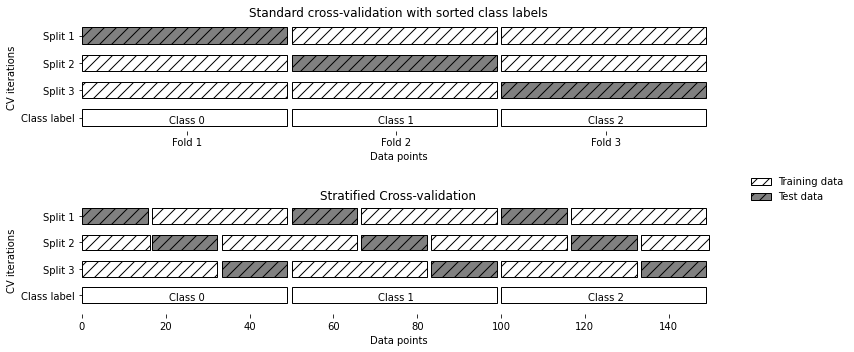

In [ ]:
mglearn.plots.plot_stratified_cross_validation()

> It is usually a good idea to use stratified k-fold cross-validation instead of k-fold cross-validation to evaluate a classifier, because it results in more reliable estimates of generalization performance. 

> For regression, scikit-learn uses the standard k-fold cross-validation by default. It would be possible to also try to make each fold representative of the different values the regression target has, but this is not a commonly used strategy and would be surprising to most users

#### More control over cross-validation

- Scikit-learn allows for much finer control over what happens during the splitting of the data by providing a crossvalidation splitter as the cv parameter. <br><br>

- For most use cases, the defaults of k-fold crossvalidation for regression and stratified k-fold for classification work well, but there are some cases where you might want to use a different strategy



In [ ]:
from sklearn.model_selection import KFold 
kfold = KFold(n_splits=5)

Then, we can pass the kfold splitter object as the cv parameter to cross_val_score:


In [ ]:
print("Cross-validation scores:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


This way, we can verify that it is indeed a really bad idea to use three-fold (nonstratified) cross-validation on the iris dataset:


In [ ]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


> Remember: each fold corresponds to one of the classes in the iris dataset, and so nothing can be learned


> Another way to resolve this problem is to shuffle the data instead of stratifying the folds, to remove the ordering of the samples by label. We can do that by setting the shuffle parameter of KFold to True. <br><br>
> If we shuffle the data, we also need to fix the random_state to get a reproducible shuffling. Otherwise, each run of cross_val_score would yield a different result, as each time a different split would be used (this might not be a problem, but can be surprising). Shuffling the data before splitting it yields a much better result:


In [ ]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
score = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
print(f"Cross-validation scores:\n {score} ")

Cross-validation scores:
 [0.98 0.96 0.96] 


#### Leave-one-out cross-validation

- LOOCV Extreme version of k-fold cross-validation — To estimate the performance of machine learning algorithms <br><br>
- LOOCV is a cross validation approach that utilizes each individual unit as a “test” set. <br><br>
- It is a specific type of k-fold cross validation, where the number of folds, k, is equal to the number of participants in your dataset.

![](./images/LOOUT.jpeg)

In [ ]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


#### Shuffle-split cross-validation

- Very flexible strategy for cross-validation is shu(e-split cross-validation. In shuffle-split cross-validation, each split samples train_size many points for the training set and test_size many (disjoint) point for the test set. This splitting is repeated n_iter times. <br><br>
- Figure 5-3 illustrates running four iterations of splitting a dataset consisting of 10 points, with a training set of 5 points and test sets of 2 points each (you can use integers for train_size and test_size to use absolute sizes for these sets, or floating-point numbers to use fractions of the whole dataset):

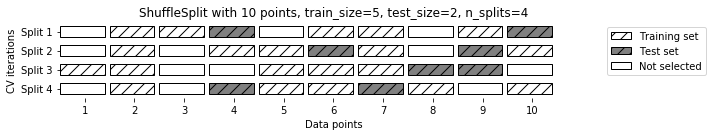

In [ ]:
mglearn.plots.plot_shuffle_split()

In [17]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.947 0.987 0.973 0.96  0.933 0.96  0.987 0.947 0.947 0.933]


##### Cross-validation with groups

- Another very common setting for cross-validation is when there are groups in the data that are highly related.  <br><br>
- Say you want to build a system to recognize emotions from pictures of faces, and you collect a dataset of pictures of 100 people where each person is captured multiple times, showing various emotions. The goal is to build a classifier that can correctly identify emotions of people not in the dataset.  <br><br>
- You could use the default stratified cross-validation to measure the performance of a classifier here. <br><br>
- However, it is likely that pictures of the same person will be in both the training and the test set. <br><br>
- To accurately evaluate the generalization to new faces, we must therefore ensure that the training and test sets contain images of different people


> To achieve this, we can use GroupKFold, which takes an array of groups as argument that we can use to indicate which person is in the image. The groups array here indicates groups in the data that should not be split when creating the training and test sets


> This example of groups in the data is common in medical applications, where you might have multiple samples from the same patient, but are interested in generalizing to new patients. Similarly, in speech recognition, you might have multiple recordings of the same speaker in your dataset, but are interested in recognizing speech of new speakers.

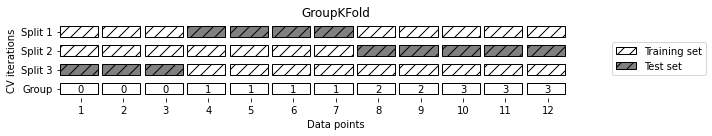

In [72]:
mglearn.plots.plot_group_kfold()

> As you can see, for each split, each group is either entirely in the training set or entirely in the test set


The following is an example of using a synthetic dataset with a grouping given by the groups array. The dataset consists of 12 data points, and for each of the data points, groups specifies which group (think patient) the point belongs to


In [75]:
from sklearn.model_selection import GroupKFold
# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group,
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.6        0.66666667]


### Grid Search

- we know how to evaluate how well a model generalizes, we can take the next step and improve the model’s generalization performance by tuning its parameters. <br><br>
- We discussed the parameter settings of many of the algorithms in scikit-learn  and it is important to understand what the parameters mean before trying to adjust them. <br><br>
- Finding the values of the important parameters of a model (the ones that provide the best generalization performance) is a tricky task, but necessary for almost all models and datasets. <br><br>
- Because it is such a common task, there are standard methods in scikit-learn to help you with it. The most commonly used method is grid search, which basically means trying all possible combinations of the parameters of interest


#### Simple Grid Search

In [30]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, random_state=0) 

svc = SVC() 
svc.fit(X_train, y_train) 
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train))) 
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


In [90]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, random_state=0) 

svm_re = SVC(kernel='poly', C=1000, gamma=0.00001).fit(X_train, y_train) # c= 1000, 0.001, 
print("Accuracy on training set: {:.2f}".format(svm_re.score(X_train, y_train))) 
print("Accuracy on test set: {:.2f}".format(svm_re.score(X_test, y_test)))


Accuracy on training set: 0.98
Accuracy on test set: 0.96


/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

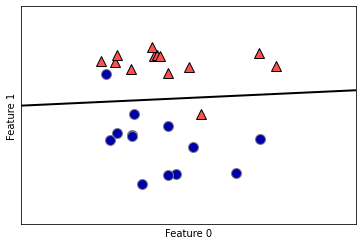

In [41]:
from sklearn.svm import LinearSVC 
linear_svm = LinearSVC().fit(X, y) 
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")


Text(0, 0.5, 'Feature 1')

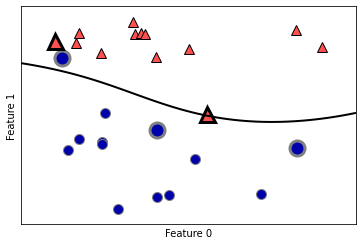

In [42]:
from sklearn.svm import SVC 
X, y = mglearn.tools.make_handcrafted_dataset() 
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y) 
mglearn.plots.plot_2d_separator(svm, X, eps=.5) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 

# plot support vectors 
sv = svm.support_vectors_ 
# class labels of support vectors are given by the sign of the dual coefficients 
sv_labels = svm.dual_coef_.ravel() > 0 
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")


> Grid search,  means trying all possible combinations of the parameters of interest.

#### Simple Grid Search

- Consider the case of a kernel SVM with an RBF (radial basis function) kernel, as implemented in the SVC class. <br><br>
- There are two important parameters: the kernel bandwidth, **gamma**, and the regularization parameter,**C** <br><br>
- Say we want to try the values 0.001, 0.01, 0.1, 1, 10, and 100 for the parameter C, and the same for gamma.  <br><br>
- Because we have six different settings for C and gamma that we want to try, we have 36 combinations of parameters in total <br><br>


> We can implement a simple grid search just as for loops over the two parameters, training and evaluating a classifier for each combination


In [20]:
# naive grid search implementation
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print("Size of training set: {}   size of test set: {}".format(
      X_train.shape[0], X_test.shape[0]))


best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112   size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


#### The danger of overfitting the parameters and the validation set

- There might be problem with previous approach <br><br>
- We tried many different parameters and selected the one with best accuracy on the test set, but this accuracy won’t necessarily carry over to new data. <br><br>
- Because we used the test data to adjust the parameters, we can no longer use it to assess how good the model is. <br><br>
- Therfore, we need an independent dataset to evaluate, one that was not used to create the model <br><br>
- One way to resolve this problem is to split the data again, so we have three sets: the training set to build the model, the validation (or development) set to select the parameters of the model, and the test set to evaluate the performance of the selected parameters. 




![](./images/train_validation_set.png)

> The validation dataset is different from the test dataset that is also held back from the training of the model, but is instead used to give an unbiased estimate of the skill of the final tuned model when comparing or selecting between final models.




![](./images/validation_train_example.png)



> Ideally, the model should be evaluated on samples that were not used to build or fine-tune the model, so that they provide an unbiased sense of model effectiveness. When a large amount of data is at hand, a set of samples can be set aside to evaluate the final model. The “training” data set is the general term for the samples used to create the model, while the “test” or “validation” data set is used to qualify performance...— Max Kuhn and Kjell Johnson, Page 67, Applied Predictive Modeling, 2013

* Training set: A set of examples used for learning, that is to fit the parameters of the classifier. <br><br>

* Validation set: A set of examples used to tune the parameters of a classifier, for example to choose the number of hidden units in a neural network and hyper-parameters for tuning <br><br>

* Test set: A set of examples used only to assess the performance of a fully-specified classifier <br><br>

> After selecting the best parameters using the validation set, we can rebuild a model using the parameter settings we found, but now training on both the training data and the validation data. 
> This way, we can use as much data as possible to build our model. This leads to the following implementation


In [92]:
pd.DataFrame(iris.target)

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [44]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)


# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the validation set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
#passing dictionary items as function arguments in python
svm = SVC(**best_parameters) # * interprets arguments as tuples and ** interprets the arguments as dictionary
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84   size of validation set: 28   size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


> The best score on the validation set is 96%: slightly lower than before, probably because we used less data to train the model (X_train is smaller now because we split our dataset twice). However, the score on the test set—the score that actually tells us how well we generalize—is even lower, at 92%. So we can only claim to classify new data 92% correctly, not 97% correctly as we thought before!


### Validation Dataset Is Not Enough



- There are other ways of calculating an unbiased, (or progressively more biased in the case of the validation dataset) estimate of model skill on unseen data. <br><br>

- One popular example is to use k-fold cross-validation to tune model hyperparameters instead of a separate validation dataset. <br><br>

- In their book, Kuhn and Johnson have a section titled “Data Splitting Recommendations” in which they layout the limitations of using a sole “test set” (or validation set <br><br>

>  There is a strong technical case to be made against a single, independent test set:

* A test set is a single evaluation of the model and has limited ability to characterize the uncertainty in the results. <br><br>
* Proportionally large test sets divide the data in a way that increases bias in the performance estimates. <br><br>
* With small sample sizes: <br><br>
  * The model may need every possible data point to adequately determine model values. <br><br>
  * The uncertainty of the test set can be considerably large to the point where different test sets may produce very different results. <br><br>
  * Resampling methods can produce reasonable predictions of how well the model will perform on future samples. <br><br>

#### Grid Search with Cross-Validation

- While the method of splitting the data into a training, a validation, and a test set that we just saw is workable, and relatively commonly used, it is quite sensitive to how exactly the data is split. <br><br>
- From the output of the previous code snippet we can see that GridSearchCV selects 'C': 10, 'gamma': 0.001 as the best parameters, while the output of the code in the previous section selects 'C': 100, 'gamma': 0.001 as the best parameters. <br><br>
- For a better estimate of the generalization performance, instead of using a single split into a training and a validation set, we can use cross-validation to evaluate the performance of each parameter combination as follows: <br><br>


In [47]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

best_score = 0

from sklearn.model_selection import cross_val_score
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

To evaluate the accuracy of the SVM using a particular setting of C and gamma using five-fold cross-validation, we need to train 36 * 5 = 180 models. As you can imagine, the main downside of the use of cross-validation is the time it takes to train all these models.


In [ ]:
mglearn.plots.plot_cross_val_selection()

The overall process of splitting the data, running the grid search, and evaluating the final parameters is illustrated in


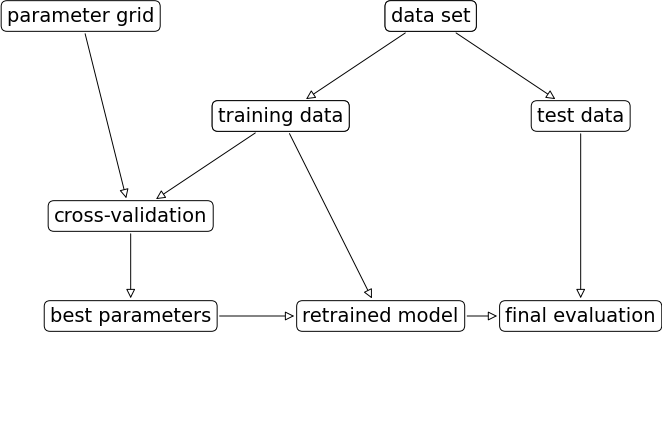

In [51]:
mglearn.plots.plot_grid_search_overview()

> Cross-validation is a way to evaluate a given algorithm on a specific dataset. However, it is often used in conjunction with parameter search methods like grid search. For this reason, many people use the term cross-validation colloquially to refer to grid search with cross-validation

- Because grid search with cross-validation is such a commonly used method to adjust parameters, Scikit-learn provides the GridSearchCV class, which implements it in the form of an estimator. <br><br>
- To use the GridSearchCV class, you first need to specify the parameters you want to search over using a dictionary.  <br><br>
-  The keys of the dictionary are the names of parameters we want to adjust (as given when constructing the model—in this case, C and gamma), and the values are the parameter settings we want to try out


In [54]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


We can now instantiate the GridSearchCV class with the model (SVC), the parameter grid to search (param_grid), and the cross-validation strategy we want to use (say, five-fold stratified cross-validation)


In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)

- GridSearchCV will use cross-validation in place of the split into a training and validation set that we used before. <br><br>
- However, we still need to split the data into a training and a test set, to avoid overfitting the parameters


In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

- The grid_search object that we created behaves just like a classifier; we can call the standard methods fit, predict, and score on it. <br><br>
- However, when we call fit, it will run cross-validation for each combination of parameters we specified in param_grid


In [75]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

- Fitting the GridSearchCV object not only searches for the best parameters, but also automatically fits a new model on the whole training dataset with the parameters that yielded the best cross-validation performance. <br><br>

- The GridSearchCV class provides a very convenient interface to access the retrained model using the predict and score methods. To evaluate how well the best found parameters generalize, we can call score on the test set:


In [76]:
print(f"Test set score: {grid_search.score(X_test, y_test)}")

Test set score: 0.9736842105263158


> Choosing the parameters using cross-validation, we actually found a model that achieves 97% accuracy on the test set. The important thing here is that we did not use the test set to choose the parameters


- The parameters that were found are scored in the best_params_ attribute, and the best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting) is stored in best_score_:


In [77]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


> Do not to confuse best_score_ with the generalization performance of the model as computed by the score method on the test set. Using the score method (or evaluating the output of the predict method) employs a model trained on the whole training set. The best_score_ attribute stores the mean cross-validation accuracy, with cross-validation performed on the training set.


Sometimes it is helpful to have access to the actual model that was found—for example, to look at coefficients or feature importances. You can access the model with the best parameters trained on the whole training set using the best_estimator_ attribute


In [79]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, gamma=0.1)


In [97]:
grid_search.

Help on GridSearchCV in module sklearn.model_selection._search object:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either es

Because grid_search itself has predict and score methods, using best_estimator_ is not needed to make predictions or evaluate the model.


##### Analyzing the result of cross-validation

- It is often helpful to visualize the results of cross-validation, to understand how the model generalization depends on the parameters we are searching. <br><br>
-  The results of a grid search can be found in the cv_results_ attribute, which is a dictionary storing all aspects of the search.


In [98]:
import pandas as pd
# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results)

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

- Each row in results corresponds to one particular parameter setting. For each setting, the results of all cross-validation splits are recorded, as well as the mean and standard deviation over all splits. <br><br>
- As we were searching a two-dimensional grid of parameters (C and gamma), this is best visualized as a heat map <br><br>
- First we extract the mean validation scores, then we reshape the scores so that the axes correspond to C and gamma



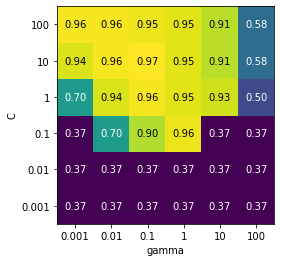

In [83]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

- Each point in the heat map corresponds to one run of cross-validation, with a particular parameter setting. The color encodes the cross-validation accuracy, with light colors meaning high accuracy and dark colors meaning low accuracy. <br><br>
- You can see that SVC is very sensitive to the setting of the parameters. For many of the parameter settings, the accuracy is around 40%, which is quite bad; for other settings the accuracy is around 96%. <br><br>
- We can take away from this plot several things. First, the parameters we adjusted are very important for obtaining good performance.  <br><br>
- Both parameters (C and gamma) matter a lot, as adjusting them can change the accuracy from 40% to 96%.    <br><br>
- Additionally, the ranges we picked for the parameters are ranges in which we see significant changes in the outcome. It’s also important to note that the ranges for the parameters are large enough: the optimum values for each parameter are not on the edges of the plot


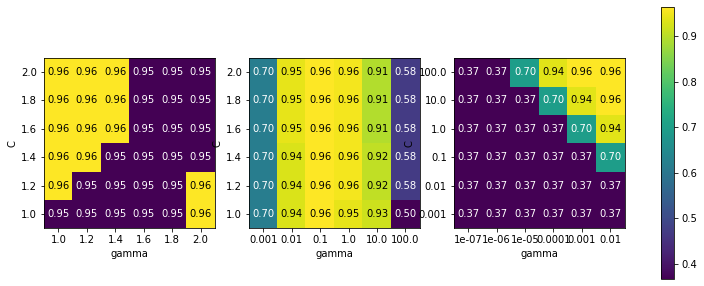

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

In [36]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [37]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [38]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,...,38,39,40,41
mean_fit_time,0.0008,0.0006,0.0008,0.0008,...,0,0,0.0002,0.001
std_fit_time,0.0004,0.00049,0.0004,0.0004,...,0,0,0.00041,1.6e-05
mean_score_time,0.0002,0.0004,0.0002,0.0002,...,0.0008,0,0,0
std_score_time,0.0004,0.00049,0.0004,0.0004,...,0.0004,0,0,0
param_C,0.001,0.001,0.001,0.001,...,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,...,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,...,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.35,0.35,0.35,0.35,...,1,1,1,0.96
split1_test_score,0.35,0.35,0.35,0.35,...,0.91,0.96,1,0.96


#### Using different cross-validation strategies with grid search

#### Nested cross-validation

In [39]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.967 1.    0.967 0.967 1.   ]
Mean cross-validation score:  0.9800000000000001


In [40]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # for each split of the data in the outer cross-validation
    # (split method returns indices of training and test parts)
    for training_samples, test_samples in outer_cv.split(X, y):
        # find best parameter using inner cross-validation
        best_parms = {}
        best_score = -np.inf
        # iterate over parameters
        for parameters in parameter_grid:
            # accumulate score over inner splits
            cv_scores = []
            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # build classifier given parameters and training data
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # evaluate on inner test set
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # if better than so far, remember parameters
                best_score = mean_score
                best_params = parameters
        # build classifier on best parameters using outer training set
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # evaluate
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [41]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.967 1.    0.967 0.967 1.   ]


##### Parallelizing cross-validation and grid search

### Evaluation Metrics and Scoring
#### Keep the End Goal in Mind

#### Metrics for Binary Classification
##### Kinds of errors
##### Imbalanced datasets

In [42]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [43]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [44]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [45]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(max_iter=1000, C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.84
logreg score: 0.98


c:\users\t3kci\checkout\scikit-learn\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


##### Confusion matrices

In [46]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


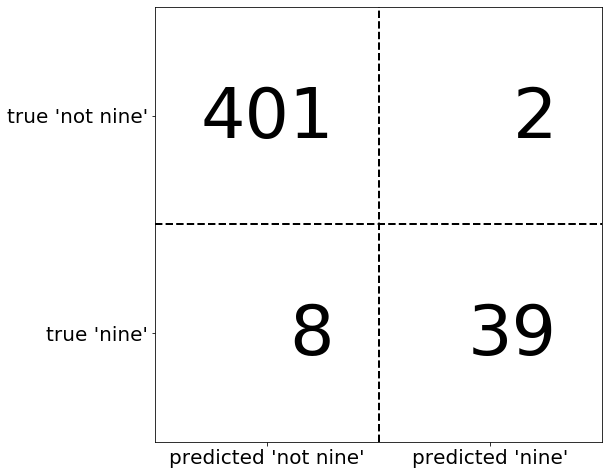

In [47]:
mglearn.plots.plot_confusion_matrix_illustration()

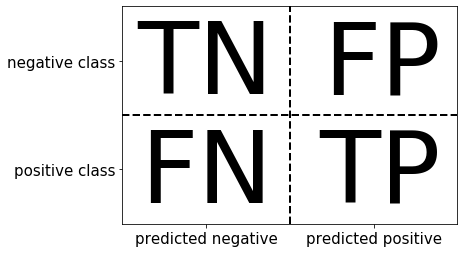

In [48]:
mglearn.plots.plot_binary_confusion_matrix()

In [49]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[362  41]
 [ 45   2]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


###### Relation to accuracy
\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

##### Precision, recall and f-score
\begin{equation}
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}

\begin{equation}
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}
\begin{equation}
\text{F} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
\end{equation}

In [50]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.04
f1 score tree: 0.55
f1 score logistic regression: 0.92


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



c:\users\t3kci\checkout\scikit-learn\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
print(classification_report(y_test, pred_dummy,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.89      0.90      0.89       403
        nine       0.05      0.04      0.04        47

    accuracy                           0.81       450
   macro avg       0.47      0.47      0.47       450
weighted avg       0.80      0.81      0.81       450



In [53]:
print(classification_report(y_test, pred_logreg,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



##### Taking uncertainty into account

In [54]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

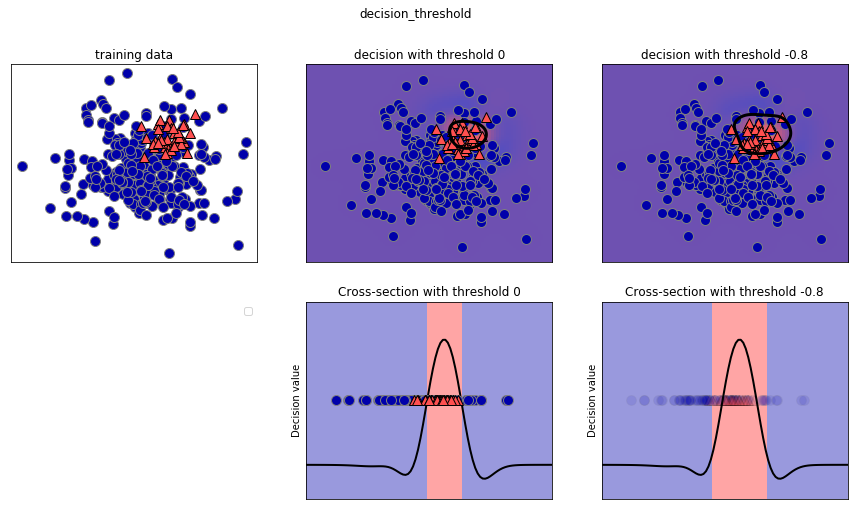

In [55]:
mglearn.plots.plot_decision_threshold()

In [56]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [57]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [58]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



##### Precision-Recall curves and ROC curves

In [59]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

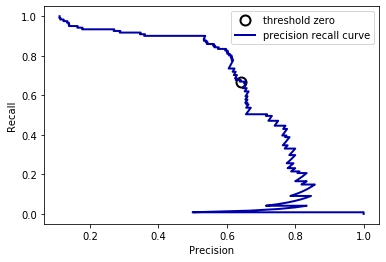

In [60]:
# Use more data points for a smoother curve
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

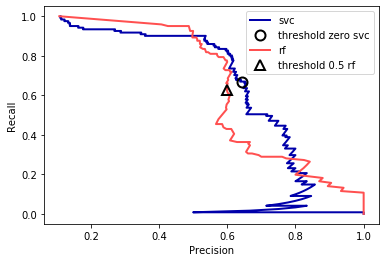

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [62]:
print("f1_score of random forest: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


In [63]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


##### Receiver Operating Characteristics (ROC) and AUC
\begin{equation}
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
\end{equation}

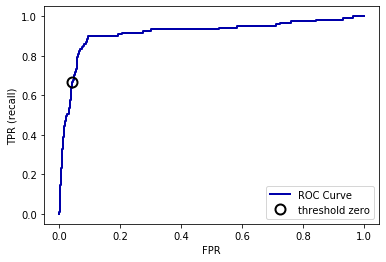

In [64]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

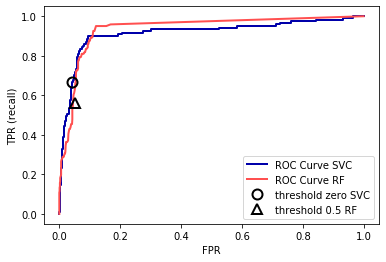

In [65]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

In [66]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


gamma = 1.00  accuracy = 0.90  AUC = 0.50
gamma = 0.05  accuracy = 0.90  AUC = 1.00
gamma = 0.01  accuracy = 0.90  AUC = 1.00


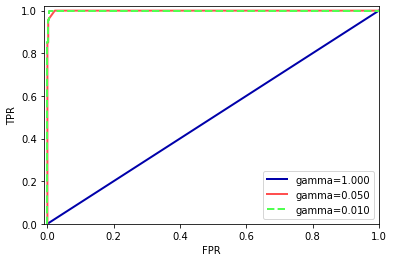

In [67]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
          gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

#### Metrics for Multiclass Classification

In [68]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.951
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


c:\users\t3kci\checkout\scikit-learn\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


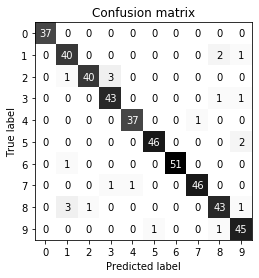

In [69]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [70]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [71]:
print("Micro average f1 score: {:.3f}".format(
    f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format(
    f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.951
Macro average f1 score: 0.952


#### Regression metrics

### Using evaluation metrics in model selection

In [72]:
# default scoring for classification is accuracy
print("Default scoring: {}".format(
    cross_val_score(SVC(), digits.data, digits.target == 9, cv=5)))
# providing scoring="accuracy" doesn't change the results
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9,
                                     scoring="accuracy", cv=5)
print("Explicit accuracy scoring: {}".format(explicit_accuracy))
roc_auc =  cross_val_score(SVC(), digits.data, digits.target == 9,
                           scoring="roc_auc", cv=5)
print("AUC scoring: {}".format(roc_auc))

Default scoring: [0.975 0.992 1.    0.994 0.981]
Explicit accuracy scoring: [0.975 0.992 1.    0.994 0.981]
AUC scoring: [0.997 0.999 1.    1.    0.984]


In [73]:
res = cross_validate(SVC(), digits.data, digits.target == 9,
                     scoring=["accuracy", "roc_auc", "recall_macro"],
                     return_train_score=True, cv=5)
display(pd.DataFrame(res))

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_recall_macro,train_recall_macro
0,0.02,8.98e-03,0.97,0.99,1.00,1.0,0.89,0.97
1,0.02,7.98e-03,0.99,1.00,1.00,1.0,0.96,0.98
2,0.02,7.98e-03,1.00,1.00,1.00,1.0,1.00,0.98
3,0.02,8.98e-03,0.99,1.00,1.00,1.0,0.97,0.98
4,0.02,7.98e-03,0.98,1.00,0.98,1.0,0.90,0.99


In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.976
Test set AUC: 0.992
Test set accuracy: 0.973


In [75]:
# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.998
Test set AUC: 1.000
Test set accuracy: 1.000


In [76]:
from sklearn.metrics import SCORERS
print("Available scorers:")
print(sorted(SCORERS.keys()))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


### Summary and Outlook